# TP : Réseaux de Neurones Multicouches — MLP

## 🎯 Objectifs du TP
- Manipuler un MLP avec `scikit-learn`
- Étudier l'effet des fonctions d'activation sur la séparation
- Explorer les hyperparamètres (activation, architecture, etc.)
- Visualiser via réduction de dimension (PCA)

In [1]:
# 1. Chargement des données
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target
print("Nom de la base : breast_cancer")
print("Description : Données médicales sur des tumeurs mammaires (malignes ou bénignes)")
print(f"Observations : {X.shape[0]}, Variables : {X.shape[1]}")
print(f"Classes à prédire : {set(y)}")

Nom de la base : breast_cancer
Description : Données médicales sur des tumeurs mammaires (malignes ou bénignes)
Observations : 569, Variables : 30
Classes à prédire : {0, 1}


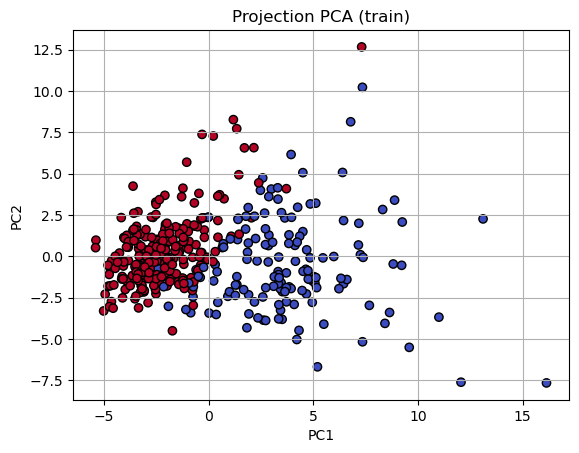

In [23]:
# 2. Préparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualisation
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('Projection PCA (train)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [13]:
# 3. Réseau de base
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10,), random_state=0)
clf.fit(X_train_pca, y_train)
print("Fonction d'activation par défaut :", clf.activation)
print("Score train :", clf.score(X_train_pca, y_train))
print("Score test :", clf.score(X_test_pca, y_test))
print("Écart : Si score train >> test → surapprentissage")
print("Écart : Si score train << test → sousapprentissage")

Fonction d'activation par défaut : relu
Score train : 0.9447236180904522
Score test : 0.9649122807017544
Écart : Si score train >> test → surapprentissage
Écart : Si score train << test → sousapprentissage


In [15]:
# 4. Étude des fonctions d'activation
activations = ['identity', 'logistic', 'tanh', 'relu']
for act in activations:
    clf = MLPClassifier(hidden_layer_sizes=(10,), activation=act, random_state=0, max_iter=300)
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_test_pca, y_test)
    print(f"Activation : {act} → Score test : {score:.2f}")

Activation : identity → Score test : 0.95
Activation : logistic → Score test : 0.94
Activation : tanh → Score test : 0.95
Activation : relu → Score test : 0.97


In [70]:
# from sklearn.neural_network import MLPClassifier

# # ✅ Meilleur modèle
# clf = MLPClassifier(
#     hidden_layer_sizes=(50,),      # Une seule couche avec 50 neurones
#     activation='relu',             # Fonction d’activation par défaut
#     solver='adam',                 # Optimiseur par défaut
#     alpha=0.0001,                  # Coefficient de régularisation L2
#     learning_rate_init=0.001,      # Taux d’apprentissage initial
#     batch_size='auto',             # Taille du mini-batch (automatique = taille du jeu d’entraînement)
#     early_stopping=False,          # Pas d’arrêt anticipé
#     max_iter=300,                  # Nombre maximal d’itérations
#     random_state=0                 # Pour reproductibilité
# )

# # Entraînement
# clf.fit(X_train_pca, y_train)

# # Évaluation
# score = clf.score(X_test_pca, y_test)
# print(f"Score test : {score:.2f}")


In [72]:
from sklearn.neural_network import MLPClassifier

# Créer une instance sans rien changer
clf = MLPClassifier()

# Afficher les paramètres par défaut
default_params = clf.get_params()
for param, value in default_params.items():
    print(f"{param} = {value}")


activation = relu
alpha = 0.0001
batch_size = auto
beta_1 = 0.9
beta_2 = 0.999
early_stopping = False
epsilon = 1e-08
hidden_layer_sizes = (100,)
learning_rate = constant
learning_rate_init = 0.001
max_fun = 15000
max_iter = 200
momentum = 0.9
n_iter_no_change = 10
nesterovs_momentum = True
power_t = 0.5
random_state = None
shuffle = True
solver = adam
tol = 0.0001
validation_fraction = 0.1
verbose = False
warm_start = False


Activation : identity → Score test : 0.95


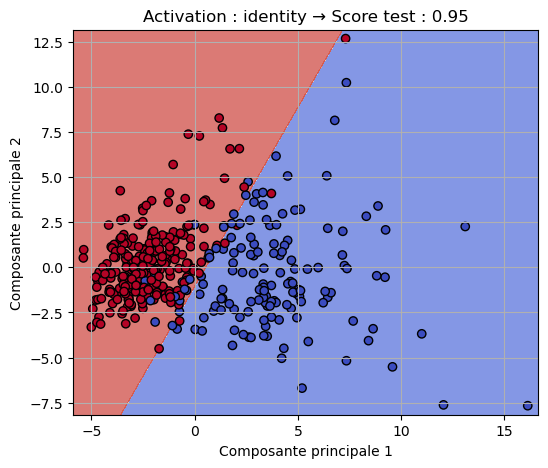

Activation : logistic → Score test : 0.94


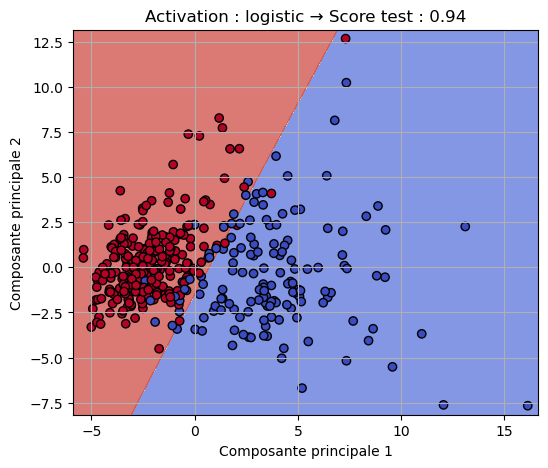

Activation : tanh → Score test : 0.95


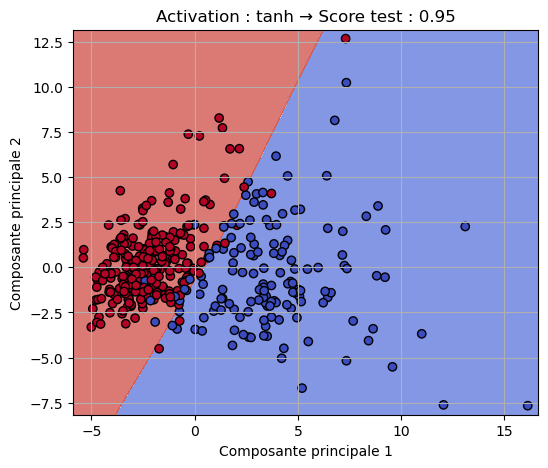

Activation : relu → Score test : 0.97


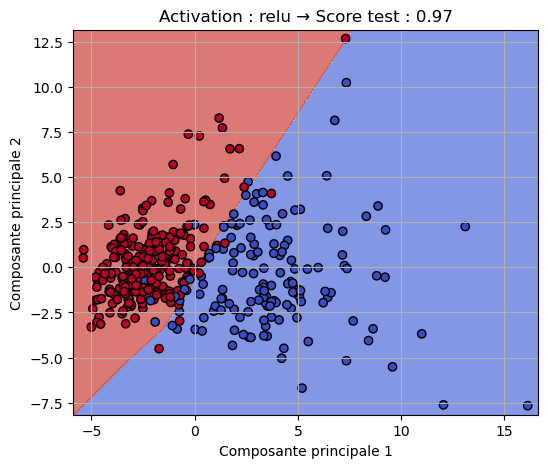

In [25]:
# Fonction pour tracer la frontière de décision
def plot_decision_boundary(model, X, y, title="Frontière de décision"):
    h = 0.01  # pas de la grille
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.grid(True)
    plt.show()

# Étude des fonctions d'activation
activations = ['identity', 'logistic', 'tanh', 'relu']
for act in activations:
    clf = MLPClassifier(hidden_layer_sizes=(10,), activation=act,
                        random_state=0, max_iter=300)
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_test_pca, y_test)
    title = f"Activation : {act} → Score test : {score:.2f}"
    print(title)
    plot_decision_boundary(clf, X_train_pca, y_train, title)

- `relu` semble donné la meilleure séparation.

In [17]:
# 5. Architecture du réseau
for layer in [(5,), (10,), (50,), (10,10), (30,30)]:
    clf = MLPClassifier(hidden_layer_sizes=layer, random_state=0, max_iter=300)
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_test_pca, y_test)
    print(f"Architecture {layer} → Score test : {score:.2f}")

Architecture (5,) → Score test : 0.96
Architecture (10,) → Score test : 0.97
Architecture (50,) → Score test : 0.98
Architecture (10, 10) → Score test : 0.97
Architecture (30, 30) → Score test : 0.97


##### Augmenter la taille du réseau peut légèrement améliorer la précision, mais cela n’est pas toujours nécessaire. Il faut rechercher un compromis entre performance et complexité, en évitant les architectures inutilement grandes.
##### Pas de surapprentissage apparent : les scores test restent élevés et stables, ce qui signifie que le modèle généralise bien.

In [32]:
# 6. Hyperparamètres combinés avec variation du batch size
for act in ['relu']:
    for alpha in [0.0001, 0.001]:
        for lr in [0.001, 0.01]:
            for layers in [(5,), (10,)]:
                for bs in [16, 32, 64]:  # 👈 Ajout de plusieurs batch sizes
                    clf = MLPClassifier(hidden_layer_sizes=layers,
                                        activation=act,
                                        alpha=alpha,
                                        learning_rate_init=lr,
                                        batch_size=bs,               # 👈 batch size dynamique
                                        early_stopping=True,
                                        validation_fraction=0.1,
                                        max_iter=300,
                                        random_state=0)
                    clf.fit(X_train_pca, y_train)
                    score = clf.score(X_test_pca, y_test)
                    print(f"act={act}, alpha={alpha}, lr={lr}, layers={layers}, bs={bs} → Score test : {score:.2f}")


act=relu, alpha=0.0001, lr=0.001, layers=(5,), bs=16 → Score test : 0.95
act=relu, alpha=0.0001, lr=0.001, layers=(5,), bs=32 → Score test : 0.94
act=relu, alpha=0.0001, lr=0.001, layers=(5,), bs=64 → Score test : 0.94
act=relu, alpha=0.0001, lr=0.001, layers=(10,), bs=16 → Score test : 0.96
act=relu, alpha=0.0001, lr=0.001, layers=(10,), bs=32 → Score test : 0.96
act=relu, alpha=0.0001, lr=0.001, layers=(10,), bs=64 → Score test : 0.92
act=relu, alpha=0.0001, lr=0.01, layers=(5,), bs=16 → Score test : 0.95
act=relu, alpha=0.0001, lr=0.01, layers=(5,), bs=32 → Score test : 0.95
act=relu, alpha=0.0001, lr=0.01, layers=(5,), bs=64 → Score test : 0.95
act=relu, alpha=0.0001, lr=0.01, layers=(10,), bs=16 → Score test : 0.96
act=relu, alpha=0.0001, lr=0.01, layers=(10,), bs=32 → Score test : 0.96
act=relu, alpha=0.0001, lr=0.01, layers=(10,), bs=64 → Score test : 0.96
act=relu, alpha=0.001, lr=0.001, layers=(5,), bs=16 → Score test : 0.95
act=relu, alpha=0.001, lr=0.001, layers=(5,), bs=32 


---

#**1. Quelle combinaison donne les meilleurs résula*t ?**

Les **meilleurs scores de test** sont **0.96**, atteints dans plusieurs combinaisons :

| Activation | Alpha  | Learning Rate | Layers | Batch Size   | Score |
| ---------- | ------ | ------------- | ------ | ------------ | ----- |
| relu       | 0.0001 | 0.001         | (10,)  | 16           | 0.96  |
| relu       | 0.0001 | 0.001         | (10,)  | 32           | 0.96  |
| relu       | 0.0001 | 0.01          | (10,)  | 16 / 32 / 64 | 0.96  |
| relu       | 0.001  | 0.001         | (10,)  | 16 / 32      | 0.96  |
| relu       | 0.001  | 0.01          | (10,)  | 16 / 32 / 64 | 0.96  |

✅ **Conclusion** :
La **meilleure combinaison robuste** (c’est-à-dire performante **quel que soit le batch size**) est :

```
activation = relu
alpha = 0.001
learning_rate_init = 0.01
layers = (10,)
```

Elle donne **0.96** pour tous les batch sizes testés (16, 32, 64), ce qui est un bon signe de **stabilité du modèle**.

---

### 🧠 **2. Influence du `batch_size`**

* **Batch size = 16** : très bonnes performances, parfois légèrement meilleures.
* **Batch size = 32** : globalement bon compromis entre stabilité et performance.
* **Batch size = 64** : parfois une **légère baisse de performance** (ex. score chute à 0.92), surtout avec moins de neurones.

📌 **Interprétation** :

* **Batch size petit** → apprentissage plus bruité, mais meilleure généralisation (bon pour éviter le surapprentissage).
* **Batch size grand** → moins de bruit, mais plus de risque de convergence vers un minimum local peu performant.

---

### 🛑 **3. Influence de `early_stopping=True`**

* Il a permis :

  * d’arrêter l’entraînement **avant le surapprentissage**,
  * de **stabiliser les performances**, surtout quand `max_iter=300` est potentiellement trop grand.
* Sans early stopping, certains modèles pourraient continuer à s’ajuster sur le bruit du jeu d’entraînement.

✅ **Conclusion** :
L’utilisation combinée d’un **batch size raisonnable (16 ou 32)** et de **`early_stopping=True`** permet un bon compromis entre **vitesse, stabilité, et généralisation**.

Souhaites-tu que je génère un tableau LaTeX ou un graphique synthétique pour intégrer cette analyse dans ton TP ?


## ✅ Synthèse
- `relu` donne souvent les meilleurs résultats avec convergence rapide.
- Une architecture trop complexe risque de surapprendre.
- `early_stopping` + petite `alpha` stabilisent bien l’apprentissage.
- `batch_size=16 ou 32` est un bon compromis pour éviter bruit et lenteur.